# PaleoAI Dataset Arithmetic

`paleoai_dataset_arithmetic.ipynb`

This notebook is for using pandas dataframes for elegantly adding or subtracting sets of data samples while maintaining unique-specimen constraints based on enforcing uniqueness for a user-specified id column. Using simple operator overloading in Python class definitions, we can perform complex queries with minimal boilerplate.

Author: Jacob A Rose  
Created on: Monday July 19th, 2021

## Top

In [ ]:
# module;function;builtin_function_or_method;ABCMeta;type

In [ ]:
%load_ext autoreload
%autoreload 2

# Code that has been outsourced to scripts

In [ ]:
from lightning_hydra_classifiers.data.common import CommonDataset, PathSchema
from lightning_hydra_classifiers.utils.dataset_management_utils import Extract
from lightning_hydra_classifiers.utils.common_utils import LabelEncoder

from IPython.display import display

import torchdata
from pathlib import Path
from copy import deepcopy
import os
import shutil
import pandas as pd
# a = torchdata.datasets.Files(["class_0/image_0.jpg"])

CommonDataset.available_datasets

from dataclasses import dataclass
from typing import *
from omegaconf import DictConfig
import collections

In [ ]:
%%bash

cd "/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3"

rm -r "Extant_family_100_512_minus_PNAS_family_100_512"
rm -r "Extant_family_10_1024_minus_PNAS_family_100_1024"
rm -r "Extant_family_10_512_minus_PNAS_family_100_512"
rm -r "Extant_family_100_1024_minus_PNAS_family_100_1024"

cd "/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3"


rm -r "Extant_family_100_512_w_PNAS_family_100_512"
rm -r "Extant_family_10_1024_w_PNAS_family_100_1024"
rm -r "Extant_family_10_512_w_PNAS_family_100_512"
rm -r "Extant_family_100_1024_w_PNAS_family_100_1024"

In [ ]:
from lightning_hydra_classifiers.data.utils import make_catalogs
dir(make_catalogs)

from lightning_hydra_classifiers.data.utils.make_catalogs import *

# A_minus_B_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/Extant_family_100_512_minus_PNAS_family_100_512")
A_minus_B_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/Extant_family_10_512_minus_PNAS_family_100_512")

config_path = list(A_minus_B_dir.glob("./*CSVDataset-config.yaml"))[0]
dataset_path = list(A_minus_B_dir.glob("./*full_dataset.csv"))[0]
print("config path: \n\t", config_path)
print("dataset path: \n\t", dataset_path)
config = CSVDatasetConfig.load(path = config_path)
dataset = CSVDataset.from_config(config)

print(config)
print(dataset)



In [ ]:
config_path = list(A_minus_B_dir.glob("./inputs/A/*CSVDataset-config.yaml"))[0]
# dataset_path = list(A_minus_B_dir.glob("./inputs/A/*full_dataset.csv"))[0]
print("config path: \n\t", config_path)
print("dataset path: \n\t", dataset_path)

config_A = CSVDatasetConfig.load(path = config_path)
dataset_A = CSVDataset.from_config(config_A)

print(dataset_A.__repr__())

In [ ]:
config_path = list(A_minus_B_dir.glob("./inputs/B/*CSVDataset-config.yaml"))[0]
# dataset_path = list(A_minus_B_dir.glob("./inputs/A/*full_dataset.csv"))[0]
print("config path: \n\t", config_path)
print("dataset path: \n\t", dataset_path)

config_B = CSVDatasetConfig.load(path = config_path)
dataset_B = CSVDataset.from_config(config_B)

print(dataset_B.__repr__())

In [ ]:
%%time

output_dir = "/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3"


base_dataset_name = "Extant"
thresholds = [10,100]
resolutions = [512,1024]
path_schema = "{family}_{genus}_{species}_{collection}_{catalog_number}"

for threshold in thresholds:
    for resolution in resolutions:
        export_dataset_catalog_configuration(output_dir=output_dir,
                                             base_dataset_name = base_dataset_name,
                                             threshold = threshold,
                                             resolution = resolution,
                                             path_schema = path_schema)

print(f'FINISHED ALL IN Extant')
print('=='*15)

base_dataset_name = "PNAS"
thresholds = [100]
resolutions = [512,1024]
path_schema = "{family}_{genus}_{species}_{catalog_number}"
for threshold in thresholds:
    for resolution in resolutions:
        export_dataset_catalog_configuration(output_dir=output_dir,
                                             base_dataset_name = base_dataset_name,
                                             threshold = threshold,
                                             resolution = resolution,
                                             path_schema = path_schema)

print(f'FINISHED ALL IN PNAS')
print('=='*15)


output_dir = "/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3"

base_names = {"A": "Extant",
              "B": "PNAS"}
thresholds = [{"A":100,
               "B":100},
             {"A":10,
               "B":100}]
resolutions = [512, 1024]

class_type = "family"


for threshold in thresholds:
    for resolution in resolutions:
        dataset_full_names = {"A":"_".join([base_names["A"], class_type, str(threshold["A"]), str(resolution)]),
                              "B":"_".join([base_names["B"], class_type, str(threshold["B"]), str(resolution)])}

        csv_cfg_path_A = os.path.join(output_dir, dataset_full_names["A"], "CSVDataset-config.yaml")
        csv_cfg_path_B = os.path.join(output_dir, dataset_full_names["B"], "CSVDataset-config.yaml")
        dataset, cfg = export_composite_dataset_catalog_configuration(output_dir=output_dir,
                                                                      csv_cfg_path_A=csv_cfg_path_A,
                                                                      csv_cfg_path_B=csv_cfg_path_B,
                                                                      composition="-")
        
        
print(f'FINISHED ALL IN Extant-PNAS')
print('=='*15)

# Back to R & D

In [ ]:
from lightning_hydra_classifiers.data.utils.catalog_registry import *

## imports & functions

In [129]:
import rich
rich.pretty.install()



from dataclasses import dataclass
import rich
from typing import *


@dataclass
class available_datasets:
    
    versions = ["v0_3", "v1_0-prerelease"]
    
    def __getitem__(self, index):
        return self.versions[index]

    
    
    
    
@dataclass
class LeavesdbBase:

#     datasets = ["PNAS", "Extant", "Fossil"]
    
    def keys(self):
        return self.__dict__.keys()
        
    def __getitem__(self, index):
        return self.__dict__[index]
    

    @property
    def datasets(self):
        return {"PNAS":self.PNAS,
                "Extant":self.Extant,
                "Fossil":self.Fossil}
    
    def __repr__(self):
        return rich.pretty.pretty_repr(self.datasets)
    
    @property
    def PNAS(self):
        return {k:self[k] for k in self.keys() if k.startswith("PNAS")}
    
    @property
    def Extant(self):
        return {k:self[k] for k in self.keys() if k.startswith("Extant")}
    
    @property
    def Fossil(self):
        return {k:self[k] for k in self.keys() if k.startswith("Fossil")}
    
    
    
    


@dataclass
class Leavesdbv0_3(LeavesdbBase):

    
    PNAS_family_100_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_512"
    PNAS_family_100_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_1024"
    PNAS_family_100_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_1536"
    PNAS_family_100_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_2048"
################################S
################################
    Extant_family_10_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/512"
    Extant_family_10_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1024"
    Extant_family_10_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1536"
    Extant_family_10_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/2048"
    Extant_family_20_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/512"
    Extant_family_20_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1024"
    Extant_family_20_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1536"
    Extant_family_20_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/2048"
    Extant_family_50_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/512"
    Extant_family_50_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1024"
    Extant_family_50_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1536"
    Extant_family_50_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/2048"
    Extant_family_100_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/512"
    Extant_family_100_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1024"
    Extant_family_100_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1536"
    Extant_family_100_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/2048"
################################
################################
    Wilf_Fossil_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
    Wilf_Fossil_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
    Wilf_Fossil_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
    Wilf_Fossil_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
    Florissant_Fossil_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil",
    Florissant_Fossil_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil",
    Florissant_Fossil_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil",
    Florissant_Fossil_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"
################################
################################
    Fossil_512: List[str] = None
    Fossil_1024: List[str] = None
    Fossil_1536: List[str] = None
    Fossil_2048: List[str] = None

    def __post_init__(self):
        
        self.Fossil_512: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
                                 "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil"]
        self.Fossil_1024: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
                                  "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil"]
        self.Fossil_1536: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
                                  "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil"]
        self.Fossil_2048: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
                                  "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"]
            
    @property
    def datasets(self):
        return {"PNAS":self.PNAS,
                "Extant":self.Extant,
                "Fossil":self.Fossil}
            
    def __repr__(self):
        return rich.pretty.pretty_repr(self.datasets)


@dataclass
class Leavesdbv1_0(LeavesdbBase):

    
#     PNAS_family_100_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_512"
#     PNAS_family_100_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_1024"
#     PNAS_family_100_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_1536"
#     PNAS_family_100_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/data_splits/PNAS_family_100_2048"
# ################################S
# ################################
#     Extant_family_10_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/512"
#     Extant_family_10_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1024"
#     Extant_family_10_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1536"
#     Extant_family_10_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/2048"
#     Extant_family_20_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/512"
#     Extant_family_20_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1024"
#     Extant_family_20_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1536"
#     Extant_family_20_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/2048"
#     Extant_family_50_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/512"
#     Extant_family_50_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1024"
#     Extant_family_50_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1536"
#     Extant_family_50_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/2048"
#     Extant_family_100_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/512"
#     Extant_family_100_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1024"
#     Extant_family_100_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1536"
#     Extant_family_100_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/2048"
# ################################
# ################################
#     Wilf_Fossil_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
#     Wilf_Fossil_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
#     Wilf_Fossil_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
#     Wilf_Fossil_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
#     Florissant_Fossil_512: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil",
#     Florissant_Fossil_1024: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil",
#     Florissant_Fossil_1536: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil",
#     Florissant_Fossil_2048: str = "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"
# ################################
# ################################
#     Fossil_512: List[str] = None
#     Fossil_1024: List[str] = None
#     Fossil_1536: List[str] = None
#     Fossil_2048: List[str] = None

#     def __post_init__(self):
        
#         self.Fossil_512: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
#                                  "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil"]
#         self.Fossil_1024: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
#                                   "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil"]
#         self.Fossil_1536: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
#                                   "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil"]
#         self.Fossil_2048: List[str] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
#                                   "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"]
            
    @property
    def datasets(self):
        return {"PNAS":self.PNAS,
                "Extant":self.Extant,
                "Fossil":self.Fossil}
            
    def __repr__(self):
        return rich.pretty.pretty_repr(self.datasets)
    
    
    
    
    
    
    
    
    
leavesdbv0_3 = Leavesdbv0_3()
leavesdbv1_0 = Leavesdbv1_0()

# leavesdbv1_0

# leavesdbv0_3#.__annotations__

# leavesdbv0_3.datasets

# leavesdbv0_3.PNAS

# leavesdbv0_3.Extant

# leavesdbv0_3.Fossil

# for k in leavesdbv0_3:
#     print(k)

# # leavesdbv0_3.__dict__['Fossil_512']
# [leavesdbv0_3['Fossil_512'],
#  leavesdbv0_3['Fossil_1024']]

# v0_3 = leavesdbv0_3

# dir(v0_3) #.__dataclass_fields__)
# # v0_3.__dataclass_fields__
# # v0_3.__dataclass_params__
# # v0_3.__annotations__
# v0_3.__dict__

# pp(leavesdbv0_3())

# from rich import print as pp

# pp(leavesdbv0_3())

available_datasets = {"Extant_family_10_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/512",
                      "Extant_family_10_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1024",
                      "Extant_family_10_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/1536",
                      "Extant_family_10_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_10/2048",
                     
                     "Extant_family_20_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/512",
                     "Extant_family_20_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1024",
                     "Extant_family_20_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/1536",
                     "Extant_family_20_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_20/2048",
                     
                     "Extant_family_50_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/512",
                     "Extant_family_50_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1024",
                     "Extant_family_50_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/1536",
                     "Extant_family_50_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_50/2048",
                     
                     "Extant_family_100_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/512",
                     "Extant_family_100_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1024",
                     "Extant_family_100_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/1536",
                     "Extant_family_100_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/catalog_files/extant_family_100/2048"}

available_datasets = {
    "Wilf_Fossil_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
    "Wilf_Fossil_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
    "Wilf_Fossil_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
    "Wilf_Fossil_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
    
    "Florissant_Fossil_512": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil",
    "Florissant_Fossil_1024": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil",
    "Florissant_Fossil_1536": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil",
    "Florissant_Fossil_2048": "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"
}

available_datasets["Fossil_512"] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Wilf_Fossil",
                                    "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_512/Florissant_Fossil"]
available_datasets["Fossil_1024"] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Wilf_Fossil",
                                     "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1024/Florissant_Fossil"]
available_datasets["Fossil_1536"] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Wilf_Fossil",
                                     "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_1536/Florissant_Fossil"]
available_datasets["Fossil_2048"] = ["/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Wilf_Fossil",
                                     "/media/data_cifs/projects/prj_fossils/data/processed_data/leavesdb-v0_3/Fossil/ccrop_2048/Florissant_Fossil"]
    
    
    
    
    

available_datasets()[0]#.versions

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "6,7"
import torchvision, torch, time
from PIL import Image
from MapExtrackt import FeatureExtractor

from lightning_hydra_classifiers.data.utils.make_catalogs import *

import numpy as np
from rising.loading import DataLoader
from tqdm.notebook import trange, tqdm

from torchvision import transforms
import time

import copy
from rich import print as pp



def train_model(model, dataloaders, criterion, optimizer, scheduler, monitor, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0
            monitor_update = 0
            
            for i, batch in tqdm(enumerate(dataloaders[phase]), total=len(dataloaders[phase]), desc=phase):
                x, y = batch[:2]
#                 x, y = x.cuda(non_blocking=pin_memory), y.cuda(non_blocking=pin_memory)
                x, y = x.to(device, non_blocking=pin_memory), y.to(device, non_blocking=pin_memory)

                if phase == "train":
                    monitor_update += 1
                    if monitor_update % 10 == 0:
                        monitor.start()
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(x)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, y)
                                
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * x.shape[0]
                running_corrects += torch.sum(preds == y.data)
            if phase == 'train':
                scheduler.step()
                

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model


def visualize_model(model,
                    dataloaders,
                    class_names,
                    num_images=6,
                    pin_memory=True):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        
        st = time.time()
        for i, batch in tqdm(enumerate(dataloader['val']), total=len(dataloader)): #leave=False, position=1, total=len(dataloader)):
            x, y = batch[:2]
            x, y = x.cuda(non_blocking=pin_memory), y.cuda(non_blocking=pin_memory)
            
            outputs = model(x)
            _, preds = torch.max(outputs, 1)        
        
            for j in range(x.shape[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(toPIL(x.cpu()).data[j])

                if images_so_far == num_images:
                    model.train(mode=was_training)
                    end_time = time.time() - st
                    return f"visualize_model()\nTotal duration: {end_time-st:.2f} seconds"                
                
            model.train(mode=was_training)
            end_time = time.time() - st
            return f"visualize_model()\nTotal duration: {end_time-st:.2f} seconds"


### Working code

In [ ]:
# output_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/")
# A_minus_B_dir = Path(output_dir, "Extant_family_10_512_minus_PNAS_family_100_512")

# config_path = list(A_minus_B_dir.glob("./CSVDataset-config.yaml"))[0]
# dataset_path = list(A_minus_B_dir.glob("./*full_dataset.csv"))[0]
# print("config path: \n\t", config_path)
# print("dataset path: \n\t", dataset_path)
# config = CSVDatasetConfig.load(path = config_path)
# dataset = CSVDataset.from_config(config)

In [ ]:
import collections
return_signature = ["image","target"]

output_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/")
A_minus_B_dir = Path(output_dir, "Extant_family_10_512_minus_PNAS_family_100_512")

config_path = list(A_minus_B_dir.glob("./CSVDataset-config.yaml"))[0]
dataset_path = list(A_minus_B_dir.glob("./*full_dataset.csv"))[0]
# print("config path: \n\t", config_path)
# print("dataset path: \n\t", dataset_path)
config = CSVDatasetConfig.load(path = config_path)
dataset = CSVDataset.from_config(config)

##########################################
# print(config)
print(dataset)

extant_minus_pnas_dataset = dataset
data_splits = DataSplitter.create_trainvaltest_splits(data=extant_minus_pnas_dataset,
                                                      val_split=0.2,
                                                      test_split="test",
                                                      shuffle=True,
                                                      seed=3654,
                                                      stratify=True)

for k, v in data_splits.items():
    print(k, len(v))
    v._return_signature = collections.namedtuple("return_signature", return_signature)

In [ ]:
# train_dataset = data_splits['train']
# val_dataset = data_splits['val']

class_names = data_splits['train'].label_encoder.classes

pin_memory = True
batch_size = 12 # 1024 # bigger memory transfers to make their cost more noticable
num_workers = 0 # parallel workers to free up the main thread and reduce data decoding overhead


# Data augmentation and normalization for training
# Just normalization for validation
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
#         transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
#         transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}


dataloaders = {subset: DataLoader(data_splits[subset],
                                  batch_size=batch_size,
#                                   sample_transforms=data_transforms[subset],
                                  shuffle=True,
                                  num_workers=num_workers)
              for subset in ['train', 'val']}

for subset in ['train', 'val']:
    data_splits[subset].transform = data_transforms[subset]

dataset_sizes = {subset: len(data_splits[subset]) for subset in ['train', 'val']}
class_names = data_splits['train'].label_encoder.classes
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

print(f'device: {device}')

In [ ]:
# b[0][0].shape
# len(b[1])
# b = [data_splits['train'][b] for b in range(10)]
# b

b = next(iter(dataloaders['train']))
b

In [ ]:
b[0].shape

In [ ]:
# Creating a monitoring object for visualzing feature maps.
from laymon import FeatureMapMonitoring
from torch import nn
num_classes = len(class_names)


fMonitor = FeatureMapMonitoring()
model_ft = torchvision.models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

In [18]:
dir(fMonitor.monitor.get_registered_observers()['fc'])

dir(fMonitor.monitor)

dir(fMonitor)

In [ ]:
unfreeze_from_layer = 'layer4'

for name, param in model_ft.named_parameters():
    if name.startswith(unfreeze_from_layer):
        break
    param.requires_grad = False
        
# pp([f"{name}-> frozen: {c.requires_grad}" for name, c in model_ft.named_children()])

pp([f"{name}-> frozen: {c.requires_grad}" for name, c in model_ft.named_parameters()])

In [ ]:
dir(fMonitor)

In [ ]:
model_ft.fc = nn.Linear(num_ftrs, num_classes)
model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = torch.optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

# fMonitor.add_model(model_ft.layer4)
fMonitor.add_layer(model_ft.layer4, "layer4")
fMonitor.add_layer(model_ft.fc, "fc")
# Get the list of layers being visualized and their corresponding observer hook objects.
fMonitor.monitor.get_registered_observers()


model_ft = train_model(model_ft,
                       dataloaders, 
                       criterion,
                       optimizer_ft,
                       exp_lr_scheduler, 
                       monitor=fMonitor,
                       num_epochs=1)

visualize_model(model=model_ft,
                dataloaders=dataloaders,
                class_names=class_names,
                num_images=batch_size-1,
                pin_memory=True)

In [ ]:


model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)






model = torchvision.models.vgg19(pretrained=True)
fe = FeatureExtractor(model)

# import torch

# def toPIL(img: torch.Tensor, mode="RGB") -> Callable:
#     return torchvision.transforms.ToPILImage(mode)(img)

# img = toPIL(dataset[0][0])

# fe.set_image(img)

# gray_img = toPIL(dataset[0][0], "HSV")
# fe.set_image(gray_img)

# fe.display_from_map(layer_no=1)

# fe[38,:]

# batch_size = 32
# num_workers = 0

# dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
# batch = next(iter(dataloader))
# len(dataloader)
# for idx, batch in enumerate(iter(dataloader)):

# batch_size = 32
# num_workers = 0
# dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
# dataloader

pin_memory = True
batch_size = 64 # 1024 # bigger memory transfers to make their cost more noticable
num_workers = 6 # parallel workers to free up the main thread and reduce data decoding overhead


dataloader = DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)
# dataloader = torch.utils.data.DataLoader(
#     train_dataset,
#     batch_size=batch_size,
#     pin_memory=pin_memory,
#     num_workers=n_workers
# )

print('pin_memory:', pin_memory)
times = []
num_runs = 2

def work():
    # emulates the CPU work done
    time.sleep(0.05)


for i in trange(num_runs, position=0):
    st = time.time()
    for i, batch in tqdm(enumerate(dataloader), leave=False, position=1, total=len(dataloader)):
        x, y = batch[:2]
        x, y = x.cuda(non_blocking=pin_memory), y.cuda(non_blocking=pin_memory)
        work()
    times.append(time.time() - st)
    

print(f"{num_runs} Epoch(s):", "\n"+"=="*15)
print('Time:')
print(f"\tAvg: {np.mean(times):.2f} seconds")
print(f"\tStd: {np.std(times):.2f}")

## Avalanche continual datasets interlude

In [14]:
# from IPython.core.interactiveshell import InteractiveShell
# # pretty print all cell's output and not just the last one
# InteractiveShell.ast_node_interactivity = "all"

# import os

# if 'TOY_DATA_DIR' not in os.environ: 
#     os.environ['TOY_DATA_DIR'] = "/media/data_cifs/projects/prj_fossils/data/toy_data"
        
# default_root_dir = os.environ['TOY_DATA_DIR']


# import pandas as pd

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', 200)


# # import continuum
# from torchvision.datasets import CIFAR10

# # from continuum.datasets import PyTorchDataset
# # dataset = PyTorchDataset("/my/data/folder/", dataset_type=CIFAR10, train=True, download=True)


# import torch
# import torchvision
# from avalanche.benchmarks.datasets import MNIST #, FashionMNIST, KMNIST, EMNIST, \
# # QMNIST, FakeData, CocoCaptions, CocoDetection, LSUN, ImageNet, CIFAR10, \
# # CIFAR100, STL10, SVHN, PhotoTour, SBU, Flickr8k, Flickr30k, VOCDetection, \
# # VOCSegmentation, Cityscapes, SBDataset, USPS, Kinetics400, HMDB51, UCF101, \
# # CelebA, CORe50, TinyImagenet, CUB200, OpenLORIS
# from avalanche.benchmarks.classic import SplitMNIST
# # As we would simply do with any Pytorch dataset we can create the train and 
# # test sets from it. We could use any of the above imported Datasets, but let's
# # just try to use the standard MNIST.
# train_MNIST = MNIST(
#     default_root_dir, train=True, download=True, transform=torchvision.transforms.ToTensor()
# )
# test_MNIST = MNIST(
#     default_root_dir, train=False, download=True, transform=torchvision.transforms.ToTensor()
# )

# # Given these two sets we can simply iterate them to get the examples one by one
# for i, example in enumerate(train_MNIST):
#     pass
# print("Num. examples processed: {}".format(i))

# # or use a Pytorch DataLoader
# train_loader = torch.utils.data.DataLoader(
#     train_MNIST, batch_size=32, shuffle=True
# )
# for i, (x, y) in enumerate(train_loader):
#     pass
# print("Num. mini-batch processed: {}".format(i))

# split_mnist = SplitMNIST(n_experiences=5, seed=1, dataset_root=default_root_dir)

# # Original train/test sets
# print('--- Original datasets:')
# print(split_mnist.original_train_dataset)
# print(split_mnist.original_test_dataset)

# dir(split_mnist)

# # A list describing which training patterns are assigned to each experience.
# # Patterns are identified by their id w.r.t. the dataset found in the
# # original_train_dataset field.
# print('--- Train patterns assignment:')
# print(split_mnist.train_exps_patterns_assignment)

# # A list describing which test patterns are assigned to each experience.
# # Patterns are identified by their id w.r.t. the dataset found in the
# # original_test_dataset field
# print('--- Test patterns assignment:')
# print(split_mnist.test_exps_patterns_assignment)

# # the task label of each experience.
# print('--- Task labels:')
# print(split_mnist.task_labels)

# # train and test streams
# print('--- Streams:')
# print(split_mnist.train_stream)
# print(split_mnist.test_stream)

# # A list that, for each experience (identified by its index/ID),
# # stores a set of the (optionally remapped) IDs of classes of patterns
# # assigned to that experience.
# print('--- Classes in each experience:')
# split_mnist.classes_in_experience


# # each stream has a name: "train" or "test"
# train_stream = split_mnist.train_stream
# print(train_stream.name)

# # we have access to the scenario from which the stream was taken
# train_stream.benchmark

# # we can slice and reorder the stream as we like!
# substream = train_stream[0]
# # print(len(substream))
# substream = train_stream[0:2]
# print(len(substream))
# substream = train_stream[0,2,1]

# print(len(substream))

# substream

# # we get the first experience
# experience = train_stream[0]

# # task label and dataset are the main attributes
# t_label = experience.task_label
# dataset = experience.dataset

# # but you can recover additional info
# experience.current_experience

# experience.classes_in_this_experience

# experience.classes_seen_so_far
# experience.previous_classes
# experience.future_classes
# experience.origin_stream
# experience.benchmark

# # As always, we can iterate over it normally or with a pytorch
# # data loader.
# # For instance, we can use tqdm to add a progress bar.
# from tqdm import tqdm
# for i, data in enumerate(tqdm(dataset)):
#     pass
# print("\nNumber of examples:", i + 1)
# print("Task Label:", t_label)

# from avalanche.benchmarks.classic import PermutedMNIST # CORe50, SplitTinyImageNet, \
# # SplitCIFAR10, SplitCIFAR100, SplitCIFAR110, SplitMNIST, RotatedMNIST, \
# # SplitCUB200, SplitImageNet

# # creating PermutedMNIST (Task-Incremental)
# # perm_mnist = PermutedMNIST(
# #     n_experiences=2,
# #     seed=1234,
# # )

# # creating the benchmark instance (scenario object)
# perm_mnist = PermutedMNIST(dataset_root=default_root_dir,
#                            n_experiences=3,
#                            seed=1234,
#                            )

# # recovering the train and test streams
# train_stream = perm_mnist.train_stream
# test_stream = perm_mnist.test_stream

# # iterating over the train stream
# for i, experience in enumerate(train_stream):
#     print(f'loop # {i}')
#     print("Start of task ", experience.task_label)
#     print('Classes in this task:', experience.classes_in_this_experience)

#     # The current Pytorch training set can be easily recovered through the
#     # experience
#     current_training_set = experience.dataset
#     # ...as well as the task_label
#     print('Task {}'.format(experience.task_label))
#     print('This task contains', len(current_training_set), 'training examples')

#     # we can recover the corresponding test experience in the test stream
#     current_test_set = test_stream[experience.current_experience].dataset
#     print('This task contains', len(current_test_set), 'test examples')

# Create Extant_minus_PNAS and PNAS_minus_Extant

In [1]:
from IPython.core.interactiveshell import InteractiveShell
# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"
import os

if 'TOY_DATA_DIR' not in os.environ: 
    os.environ['TOY_DATA_DIR'] = "/media/data_cifs/projects/prj_fossils/data/toy_data"
        
default_root_dir = os.environ['TOY_DATA_DIR']
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', 200)

from avalanche.benchmarks.generators import filelist_benchmark, dataset_benchmark, \
                                            tensors_benchmark, paths_benchmark
import avalanche
import torch
import torchvision
from avalanche.benchmarks.datasets import MNIST, CIFAR10 #, FashionMNIST, KMNIST, EMNIST, \
# QMNIST, FakeData, CocoCaptions, CocoDetection, LSUN, ImageNet, , \

from avalanche.benchmarks.utils import AvalancheDataset
from lightning_hydra_classifiers.data.utils import make_catalogs
from lightning_hydra_classifiers.utils.common_utils import (LabelEncoder,
                                                            trainval_split,
                                                            trainvaltest_split,
                                                            plot_split_distributions,
                                                            plot_class_distributions)
import torchdata
from lightning_hydra_classifiers.data.utils.make_catalogs import *

## Load and preprocess pre-formatted csv datasets and create train val test splits

### pause

In [2]:
# from lightning_hydra_classifiers.train_BYOL import *

# exp = TransferExperiment()
# task_0 = exp.setup_task_0()
# task_1 = exp.setup_task_1()

from lightning_hydra_classifiers.train_BYOL import *

torch.backends.cudnn.benchmark = True

exp = TransferExperiment()
task_0, task_1 = exp.get_multitask_datasets()

# test_0 = task_0['test']
# unsupervised_test_0 = test_0.get_unsupervised()
# unsupervised_test_0

BATCH_SIZE = 64
NUM_WORKERS = 8

train_us = task_0['train'].get_unsupervised()
train_us.dataset.transform = lambda x: x
train_loader = torch.utils.data.DataLoader(train_us, batch_size=BATCH_SIZE, num_workers=NUM_WORKERS, shuffle=True)

%%time
from datetime import datetime
from tqdm.auto import tqdm
num_samples = len(train_loader)*BATCH_SIZE


st = datetime.now()
# for i, batch in enumerate(tqdm(train_loader, unit="imgs", unit_scale=BATCH_SIZE)):
for i, batch in enumerate(tqdm(train_loader, unit="imgs", unit_scale=True, unit_divisor=1/BATCH_SIZE)):
#     print(i)
#     len(batch)
    pass

et = datetime.now()
total = et - st
num_samples = i*BATCH_SIZE
print(f"Data loading rate: {num_samples / total.total_seconds():.2f} images/s")

## continue

In [4]:
import os


os.environ['CUDA_VISIBLE_DEVICES'] = '5'

from torchvision.models import mobilenet_v2, resnet50
from torchvision.datasets import STL10
from torchvision.transforms import ToTensor
from torchvision import transforms
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt
import os
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

if 'TOY_DATA_DIR' not in os.environ: 
    print(f"Setting env variable $TOY_DATA_DIR={os.environ['TOY_DATA_DIR']}")
    os.environ['TOY_DATA_DIR'] = "/media/data_cifs/projects/prj_fossils/data/toy_data"
default_root_dir = os.environ['TOY_DATA_DIR']


os.environ["CUDA_LAUNCH_BLOCKING"] = "1"

from lightning_hydra_classifiers.train_BYOL import *
torch.backends.cudnn.benchmark = True
from torchbearer.cv_utils import DatasetValidationSplitter
from munch import Munch

config = Munch({"dataset_name":"Extant-PNAS"})
# config = Munch({"dataset_name":"STL10"})

print(f"config: {config}")


transform = transforms.Compose([ToTensor(),
                               normalize])



if config.dataset_name == "STL10":
    train_data = STL10(os.environ['TOY_DATA_DIR'], split='train', transform=transform, download=True)
    test_data = STL10(os.environ['TOY_DATA_DIR'], split='test', transform=transform, download=True)
    
    splitter = DatasetValidationSplitter(len(train_data), 0.1)
    train_set = splitter.get_train_dataset(train_data)
    val_set = splitter.get_val_dataset(train_data)
    
else:
    exp = TransferExperiment()
    task_0, task_1 = exp.get_multitask_datasets(train_transform=transform,
                                                val_transform=transform)
    train_data, val_data, test_data = task_0["train"], task_0["val"], task_0["test"]
    train_set, val_set = train_data, val_data

classes = train_data.classes
num_classes = len(classes)
print('\n List of all classes: ')
print(classes)

BATCH_SIZE = 16
num_workers = 2
pin_memory = False

train_gen = torch.utils.data.DataLoader(train_set, pin_memory=pin_memory, batch_size=BATCH_SIZE, shuffle=True, num_workers=num_workers)
val_gen = torch.utils.data.DataLoader(val_set, pin_memory=pin_memory, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)
# testset = torchvision.datasets.CIFAR10(root='./data/cifar', train=False, download=True,
#                                        transform=transforms.Compose([transforms.ToTensor(), normalize]))
test_gen = torch.utils.data.DataLoader(test_data, pin_memory=pin_memory, batch_size=BATCH_SIZE, shuffle=False, num_workers=num_workers)


import torch.nn as nn
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'
# cm = PyCM().on_val().to_html_file('cm.{epoch}')

# We copy the final layer form MobileNetV2 and replace the linear layer with one to 10 channels

# model = mobilenet_v2(pretrained=True, progress=False)
# model.classifier = nn.Sequential(
#             nn.Dropout(0.2),
#             nn.Linear(model.last_channel, num_classes),
#         )


model = resnet50(pretrained=True, progress=False)

model.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(model.fc.in_features, num_classes+1),
        )



In [11]:
# import torchsummary
# import torchinfo
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

import torch.optim as optim

import torchbearer
from torchbearer import Trial
from torchbearer.callbacks import PyCM

# pp(dict(model.named_modules()).keys())

freeze_at = "fc"


# for k, m in model.named_modules():
#     if (k.startswith("features")) or (k.startswith("layer")):
#         print(f"Freezing: {k}")
#         m.requires_grad = False
#     else:
#         print(f"Unfreezing: {k}")
#         m.requires_grad = True
        
#     print(f"{k} : {m.requires_grad}")
freeze_current=False
for k, m in model.named_modules():
    if (k == freeze_at) or freeze_current:
        freeze_current=True
        print(f"Unfreezing: {k}")
        m.requires_grad = True
    else:
        print(f"Freezing: {k}")
        m.requires_grad = False
        
    print(f"{k} : {m.requires_grad}")



import numpy as np
# np.max(train_data.targets)
np.min(train_data.targets)

In [15]:
list(model.fc.modules())[-1].out_features

178

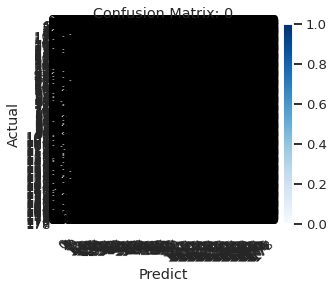

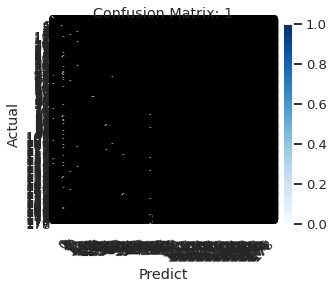

In [6]:
cm = PyCM().on_val().to_pyplot(normalize=True, title='Confusion Matrix: {epoch}')
cm_csv = PyCM().on_val().to_csv_file("cm_{epoch}")

# model = SimpleModel()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
loss = nn.CrossEntropyLoss()


trial = Trial(model, optimizer, loss, metrics=['acc', 'loss'], callbacks=[cm,cm_csv]).to(device)
trial.with_generators(train_generator=train_gen, val_generator=val_gen)
history = trial.run(epochs=2, verbose=2)

In [ ]:
cm = PyCM().on_val().to_obj_file('cm.{epoch}')

In [ ]:
from pycm import ConfusionMatrix, Compare

epoch_0 = ConfusionMatrix(file=open('cm.0.obj', 'r'))
epoch_1 = ConfusionMatrix(file=open('cm.1.obj', 'r'))
epoch_2 = ConfusionMatrix(file=open('cm.2.obj', 'r'))
epoch_3 = ConfusionMatrix(file=open('cm.3.obj', 'r'))
epoch_4 = ConfusionMatrix(file=open('cm.4.obj', 'r'))

print(Compare({"0": epoch_0, "1": epoch_1, "2": epoch_2, "3": epoch_3, "4": epoch_4}))

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

cm = PyCM().on_val().to_html_file('cm.{epoch}')

model = SimpleModel()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
loss = nn.CrossEntropyLoss()

trial = Trial(model, optimizer, loss, metrics=['acc', 'loss'], callbacks=[cm]).to(device)
trial.with_generators(train_generator=traingen, val_generator=valgen)
history = trial.run(epochs=5, verbose=1)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

def to_pandas_seaborn(normalize=False,title='Confusion matrix',annot=False,cmap="YlGnBu"):
    def handler(cm, state):
        plt.figure()
        string_state = {str(key): state[key] for key in state.keys()}  # For string formatting
        if normalize == True:
            df = DataFrame(cm.normalized_matrix).T.fillna(0)
        else:
            df = DataFrame(cm.matrix).T.fillna(0)
        ax = sns.heatmap(df,annot=annot,cmap=cmap)
        ax.set_title(title.format(**string_state))
        ax.set(xlabel='Predict', ylabel='Actual')
        plt.show()
    return handler

from torchbearer.callbacks import PyCM
cm = PyCM().on_val().with_handler(to_pandas_seaborn(normalize=True, title='Confusion Matrix: {epoch}'))

In [ ]:
import torch
device = 'cuda' if torch.cuda.is_available() else 'cpu'

import torch.optim as optim

import torchbearer
from torchbearer import Trial

model = SimpleModel()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
loss = nn.CrossEntropyLoss()

trial = Trial(model, optimizer, loss, metrics=['acc', 'loss'], callbacks=[cm]).to(device)
trial.with_generators(train_generator=traingen, val_generator=valgen)
history = trial.run(epochs=2, verbose=1)

In [26]:
from torchbearer import Trial
import torch
from torch.optim import Adam


trial = Trial(model, optimizer=Adam(model.classifier.parameters()), criterion=torch.nn.CrossEntropyLoss(reduction='sum'), metrics=['acc'])
# Whilst this is bad practice, we validate on the test set for this example for simplicity. 
# Better practice would create a separate validation split using a DatasetValidationSplitter (see quickstart example)
trial.with_train_generator(train_loader).with_val_generator(test_loader)
trial.to('cuda')
feature_extractor_hist = trial.run(5, verbose=1)

In [26]:
trial = Trial(model, optimizer=Adam(model.parameters()), criterion=torch.nn.CrossEntropyLoss(reduction='sum'), metrics=['acc'])
# Whilst this is bad practice, we validate on the test set for this example for simplicity. 
# Better practice would create a separate validation split using a DatasetValidationSplitter (see quickstart example)
trial.with_train_generator(train_loader).with_val_generator(test_loader)
trial.to('cuda')
transfer_learning_hist = trial.run(5, verbose=1)

In [ ]:
random_model = mobilenet_v2(pretrained=False, progress=False)
random_model.classifier = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(random_model.last_channel, 10),
        )


trial = Trial(random_model, optimizer=Adam(random_model.parameters()), criterion=torch.nn.CrossEntropyLoss(reduction='sum'), metrics=['acc'])
# Whilst this is bad practice, we validate on the test set for this example for simplicity. 
# Better practice would create a separate validation split using a DatasetValidationSplitter (see quickstart example)
trial.with_train_generator(train_loader).with_val_generator(test_loader)
trial.to('cuda')
random_model_hist = trial.run(5, verbose=1)

In [ ]:
feature_accs = []
transfer_accs = []
random_accs = []

def plot_curves(metric_label, plot_title):
    for i in range(len(feature_extractor_hist)):
        feature_accs.append(feature_extractor_hist[i][metric_label])
        transfer_accs.append(transfer_learning_hist[i][metric_label])
        random_accs.append(random_model_hist[i][metric_label])

    plt.plot(feature_accs, label='Feature Extractor')
    plt.plot(transfer_accs, label='Transfer Learning')
    plt.plot(random_accs, label='Random Model')
    plt.legend()
    plt.grid()
    plt.title(plot_title)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

plot_curves('acc', 'Training Accuracy')
plot_curves('val_acc', 'Validation Accuracy')


In [21]:

batch.shape

torch.Size([32, 3, 512, 512])

In [ ]:
model = SelfSupervisedLearner(
    resnet,
    image_size = IMAGE_SIZE,
    hidden_layer = 'avgpool',
    projection_size = 256,
    projection_hidden_size = 4096,
    moving_average_decay = 0.99
)

trainer = pl.Trainer(
    gpus = NUM_GPUS,
    max_epochs = EPOCHS,
    accumulate_grad_batches = 1,
    sync_batchnorm = True
)

trainer.fit(model, train_loader)

In [3]:
import torchdata

# class UnsupervisedDatasetWrapper(torchdata.datasets.Files):
class UnsupervisedDatasetWrapper(torchvision.datasets.ImageFolder):
    
    def __init__(self, dataset):
        
        self.dataset = dataset
        
    def __getitem__(self, index):
        return self.dataset[index][0]
    
    def __len__(self):
        return len(self.dataset)
    
    def __repr__(self):
        out = "<UnsupervisedDatasetWrapper>\n"
        out += self.dataset.__repr__()
        return out

In [8]:
task_0['test'][0]

for subset in ["train","val","test"]:
    task_0[subset] = UnsupervisedDatasetWrapper(task_0[subset])
    task_1[subset] = UnsupervisedDatasetWrapper(task_1[subset])

task_0['test'][0]

type(task_0['test'].dataset)

task_0['test']#.dataset

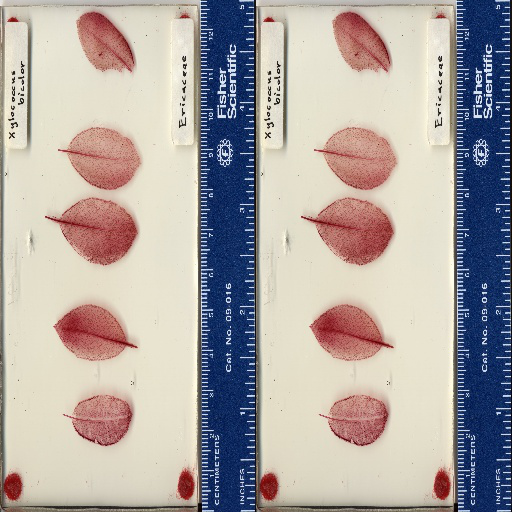

In [10]:
task_0['test'][1]

In [10]:
eager_encode_targets = False

experiment_root_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v1_0/")

def load_task_0(experiment_root_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v1_0/")):
    """
    TASK 0
    Produces train, val, and test subsets for task 0
    
    train + val: 
        Extant_Leaves_minus_PNAS
    test:
        Extant_Leaves_in_PNAS
    
    """
    A_minus_B_dir = Path(experiment_root_dir, "Extant_Leaves_family_10_512_minus_PNAS_family_100_512")
    config_path = list(A_minus_B_dir.glob("./CSVDataset-config.yaml"))[0]
    dataset_path = list(A_minus_B_dir.glob("./*full_dataset.csv"))[0]
    print("config path: \n\t", config_path)
    print("dataset path: \n\t", dataset_path)
    config = CSVDatasetConfig.load(path = config_path)
    dataset = CSVDataset.from_config(config, eager_encode_targets=eager_encode_targets)
    ##########################################
    extant_minus_pnas_dataset = dataset
    A_minus_B_data_splits = DataSplitter.create_trainvaltest_splits(data=extant_minus_pnas_dataset,
                                                                    val_split=0.2,
                                                                    test_split="test",
                                                                    shuffle=True,
                                                                    seed=3654,
                                                                    stratify=True)

    test_config_path = A_minus_B_dir / "A_in_B-CSVDataset-config.yaml"
    test_config = CSVDatasetConfig.load(path = test_config_path)
    test_dataset = CSVDataset.from_config(test_config, eager_encode_targets=eager_encode_targets)
    A_minus_B_data_splits['test'] = test_dataset
    task_0 = A_minus_B_data_splits
    return task_0
    

def load_task_1(experiment_root_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v1_0/")):
    """
    TASK 1
    Produces train, val, and test subsets for task 1
    
    train + val: 
        PNAS_minus_Extant_Leaves
    test:
        PNAS_in_Extant_Leaves
    
    """

    B_minus_A_dir = Path(experiment_root_dir, "PNAS_family_100_512_minus_Extant_family_10_512")
    config_path = list(B_minus_A_dir.glob("./CSVDataset-config.yaml"))[0]
    config = CSVDatasetConfig.load(path = config_path)
    dataset = CSVDataset.from_config(config)
    ##########################################
    pnas_minus_extant_dataset = dataset
    B_minus_A_data_splits = DataSplitter.create_trainvaltest_splits(data=pnas_minus_extant_dataset,
                                                                    val_split=0.2,
                                                                    test_split="test",
                                                                    shuffle=True,
                                                                    seed=3654,
                                                                    stratify=True)

    test_config_path = B_minus_A_dir / "A_in_B-CSVDataset-config.yaml"
    test_config = CSVDatasetConfig.load(path = test_config_path)
    test_dataset = CSVDataset.from_config(test_config)
    B_minus_A_data_splits['test'] = test_dataset
    task_1 = B_minus_A_data_splits
    
    return task_1



# len(A_minus_B_data_splits['test'].targets)
# len(B_minus_A_data_splits['test'].targets)
# len(set(A_minus_B_data_splits['test'].targets))
# len(set(B_minus_A_data_splits['test'].targets))

In [10]:
eager_encode_targets = False

experiment_root_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/")
A_minus_B_dir = Path(output_dir, "Extant_Leaves_family_10_512_minus_PNAS_family_100_512")


config_path = list(A_minus_B_dir.glob("./CSVDataset-config.yaml"))[0]
dataset_path = list(A_minus_B_dir.glob("./*full_dataset.csv"))[0]
print("config path: \n\t", config_path)
print("dataset path: \n\t", dataset_path)
config = CSVDatasetConfig.load(path = config_path)
dataset = CSVDataset.from_config(config, eager_encode_targets=eager_encode_targets)

##########################################
print(config)
print(dataset)
extant_minus_pnas_dataset = dataset
A_minus_B_data_splits = DataSplitter.create_trainvaltest_splits(data=extant_minus_pnas_dataset,
                                                                val_split=0.2,
                                                                test_split="test",
                                                                shuffle=True,
                                                                seed=3654,
                                                                stratify=True)

test_config_path = experiment_dir / "A_in_B-CSVDataset-config.yaml"
test_config = CSVDatasetConfig.load(path = test_config_path)
test_dataset = CSVDataset.from_config(test_config, eager_encode_targets=eager_encode_targets)
A_minus_B_data_splits['test'] = test_dataset


# output_dir = Path("/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/")
B_minus_A_dir = Path(output_dir, "PNAS_family_100_512_minus_Extant_family_10_512")
config_path = list(B_minus_A_dir.glob("./CSVDataset-config.yaml"))[0]
config = CSVDatasetConfig.load(path = config_path)
dataset = CSVDataset.from_config(config)

##########################################
pnas_minus_extant_dataset = dataset
B_minus_A_data_splits = DataSplitter.create_trainvaltest_splits(data=pnas_minus_extant_dataset,
                                                                val_split=0.2,
                                                                test_split="test",
                                                                shuffle=True,
                                                                seed=3654,
                                                                stratify=True)

test_config_path = "/media/data_cifs/projects/prj_fossils/users/jacob/experiments/July2021-Nov2021/csv_datasets/leavesdb-v0_3/PNAS_family_100_512_minus_Extant_family_10_512/A_in_B-CSVDataset-config.yaml"
test_config = CSVDatasetConfig.load(path = test_config_path)
test_dataset = CSVDataset.from_config(test_config)

B_minus_A_data_splits['test'] = test_dataset

# dir(avalanche.benchmarks.utils)
# B_minus_A_data_splits

# train_task1 = AvalancheDataset(B_minus_A_data_splits['train'], task_labels=1)
# val_task1 = AvalancheDataset(B_minus_A_data_splits['val'], task_labels=1)
# test_task1 = AvalancheDataset(B_minus_A_data_splits['test'], task_labels=1)

# for sub in ['train', 'val', 'test']:
#     print(f"{sub}:")
#     print(len(A_minus_B_data_splits[sub].targets))
#     print(len(B_minus_A_data_splits[sub].targets))
    
#     print(type(A_minus_B_data_splits[sub].targets[0]))
#     print(type(B_minus_A_data_splits[sub].targets[0]))


len(A_minus_B_data_splits['test'].targets)
len(B_minus_A_data_splits['test'].targets)


len(set(A_minus_B_data_splits['test'].targets))
len(set(B_minus_A_data_splits['test'].targets))

## Reformat data subsets from each dataset into task_0 and task_1 format. Export all into multi-task format

In [26]:
replace_class_indices = {"Nothofagaceae":"Fagaceae"}

experiment_dir = "/media/data/jacob/GitHub/lightning-hydra-classifiers/notebooks/experiments_August_2021/Extant-to-PNAS-512-transfer_benchmark"
os.makedirs(experiment_dir, exist_ok=True)
task_0 = A_minus_B_data_splits
task_1 = B_minus_A_data_splits

task_0_label_encoder = task_0['train'].label_encoder
task_0_label_encoder.__init__(replace = replace_class_indices)

task_0_label_encoder.fit(task_0['test'].targets)
len(task_0_label_encoder.classes)
task_0_label_encoder.fit(task_0['train'].targets)
len(task_0_label_encoder.classes)

task_0['val'].label_encoder = task_0_label_encoder
task_0['test'].label_encoder = task_0_label_encoder

task_0_dir = Path(experiment_dir, "task_0")
os.makedirs(task_0_dir, exist_ok=True)
for subset in ["train","val","test"]:
    task_0[subset].setup(samples_df=task_0[subset].samples_df,
                         label_encoder=task_0[subset].label_encoder,
                         fit_targets=False)

    CSVDatasetConfig.export_dataset_state(output_dir=task_0_dir, # / subset,
                                          df=task_0[subset].samples_df,
                                          config=task_0[subset].config,
                                          encoder=task_0_label_encoder,
                                          dataset_name=subset)
    

# replace_class_indices = {"Nothofagaceae":"Fagaceae"}
# experiment_dir = "/media/data/jacob/GitHub/lightning-hydra-classifiers/notebooks/experiments_August_2021/Extant-to-PNAS-512-transfer_benchmark"
# os.makedirs(experiment_dir, exist_ok=True)

task_1_label_encoder = task_1['train'].label_encoder
task_1_label_encoder.__init__(replace = replace_class_indices)
task_1_label_encoder.fit(task_1['test'].targets)
task_1_label_encoder.fit(task_1['train'].targets)
task_1['val'].label_encoder = task_1_label_encoder
task_1['test'].label_encoder = task_1_label_encoder

task_1_dir = Path(experiment_dir, "task_1")
os.makedirs(task_1_dir, exist_ok=True)
for subset in ["train","val","test"]:
    task_1[subset].setup(samples_df=task_1[subset].samples_df,
                         label_encoder=task_1[subset].label_encoder,
                         fit_targets=False)
    CSVDatasetConfig.export_dataset_state(output_dir=task_1_dir, # / subset,
                                          df=task_1[subset].samples_df,
                                          config=task_1[subset].config,
                                          encoder=task_1_label_encoder,
                                          dataset_name=subset)

# Import and preprocess datasets for training

In [13]:
experiment_dir = Path("/media/data/jacob/GitHub/lightning-hydra-classifiers/notebooks/experiments_August_2021/Extant-to-PNAS-512-transfer_benchmark")
task_0_dir = experiment_dir / "task_0"
task_1_dir = experiment_dir / "task_1"
task_0, task_1 = {}, {}

for subset in ["train","val","test"]:
    task_0[subset], _ = CSVDatasetConfig.import_dataset_state(config_path = task_0_dir / f"{subset}.yaml")
    task_1[subset], _ = CSVDatasetConfig.import_dataset_state(config_path = task_1_dir / f"{subset}.yaml")

task_0["train"][0][0]
task_0["val"][0][0]
task_0["test"][0][0]

task_1["train"][0][0]
task_1["val"][0][0]
task_1["test"][0][0]

### Create transforms

In [14]:
from torchvision import transforms
from typing import *


totensor: Callable = torchvision.transforms.ToTensor()

def toPIL(img: torch.Tensor, mode="RGB") -> Callable:
    return torchvision.transforms.ToPILImage(mode)


def normalize_transform(mean = [0.485, 0.456, 0.406],
                        std = [0.229, 0.224, 0.225]) -> Callable:
    return transforms.Normalize(mean=mean,
                                std=std)

def default_train_transforms(image_size: int=224,
                             normalize: bool=True, 
                             augment:bool=True,
                             grayscale: bool=True,
                             channels: Optional[int]=3,
                             mean = [0.485, 0.456, 0.406],
                             std = [0.229, 0.224, 0.225]):
    """Subclasses can override this or user can provide custom transforms at runtime"""
    transform_list = []
#         transform_jit_list = []
    resize_PIL = not augment
    if augment:
        transform_list.extend([transforms.RandomResizedCrop(size=image_size,
                                                            scale=(0.25, 1.2),
                                                            ratio=(0.7, 1.3),
                                                            interpolation=2),
                               totensor
                             ])
    return default_eval_transforms(image_size=image_size,
                                        normalize=normalize,
                                        resize_PIL=resize_PIL,
                                        grayscale=grayscale,
                                        channels=channels,
                                        transform_list=transform_list,
                                        mean=mean,
                                        std=std)

def default_eval_transforms(image_size: int=224,
                            image_buffer_size: int=32,
                            normalize: bool=True,
                            resize_PIL: bool=True,
                            grayscale: bool=True,
                            channels: Optional[int]=3,
                            transform_list: Optional[List[Callable]]=None,
                            mean = [0.485, 0.456, 0.406],
                            std = [0.229, 0.224, 0.225]):
    """Subclasses can override this or user can provide custom transforms at runtime"""
    transform_list = transform_list or []
    transform_jit_list = []

    if resize_PIL:
        # if True, assumes input images are PIL.Images (But need to check if this even matters.)
        # if False, expects input images to already be torch.Tensors
        transform_list.extend([transforms.Resize(image_size+image_buffer_size),
                               transforms.CenterCrop(image_size),
                               totensor])
    if normalize:
        transform_jit_list.append(normalize_transform(mean, std))

    if grayscale:
        transform_jit_list.append(transforms.Grayscale(num_output_channels=channels))

    return transforms.Compose([*transform_list, *transform_jit_list])


def get_default_transforms(image_size: int=224,
                           normalize: bool=True,
                           augment:bool=True,
                           grayscale: bool=True,
                           channels: Optional[int]=3,
                           mean = [0.485, 0.456, 0.406],
                           std = [0.229, 0.224, 0.225]):

    
    train_transform = default_train_transforms(image_size=image_size,
                                               normalize=normalize,
                                               augment=augment,
                                               grayscale=grayscale,
                                               channels=channels,
                                               mean=mean,
                                               std=std)
    eval_transform = default_eval_transforms(image_size=image_size,
                                             image_buffer_size=32,
                                             normalize=normalize,
                                             resize_PIL=not augment,
                                             grayscale=grayscale,
                                             channels=channels,
                                             transform_list=None,
                                             mean=mean,
                                             std=std)
    
    
    
    return train_transform, eval_transform

In [15]:
train_transform, val_transform = get_default_transforms(image_size=224,
                                                         normalize=True,
                                                         augment=True,
                                                         grayscale=True,
                                                         channels=3,
                                                         mean = [0.485, 0.456, 0.406],
                                                         std = [0.229, 0.224, 0.225])

### Assemble Avalanche Datasets for task 0 and task 1

In [20]:
avalanche_tasks = {0: {},
                   1: {}}

transforms = {"train":train_transform,
              "val": val_transform,
              "test": val_transform}

for subset in ['train','val','test']:
    avalanche_tasks[0][subset] = AvalancheDataset(task_0[subset], task_labels=0, transform=transforms[subset])
    avalanche_tasks[1][subset] = AvalancheDataset(task_1[subset], task_labels=1, transform=transforms[subset])


In [21]:
avalanche_tasks

{0: {'train': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afb97e610>,
  'val': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afb97e130>,
  'test': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afb97edc0>},
 1: {'train': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afb97ec10>,
  'val': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afbba6a90>,
  'test': <avalanche.benchmarks.utils.avalanche_dataset.AvalancheDataset at 0x7f8afb97eb50>}}

In [ ]:
train_task0 = AvalancheDataset(A_minus_B_data_splits['train'], task_labels=0)#, transform=train_transform)
val_task0 = AvalancheDataset(A_minus_B_data_splits['val'], task_labels=0) #, transform=eval_transform)
test_task0 = AvalancheDataset(A_minus_B_data_splits['test'], task_labels=0) #, transform=eval_transform)

#########################################

train_task1 = AvalancheDataset(B_minus_A_data_splits['train'], task_labels=1) #, transform=train_transform)
val_task1 = AvalancheDataset(B_minus_A_data_splits['val'], task_labels=1) #, transform=eval_transform)
test_task1 = AvalancheDataset(B_minus_A_data_splits['test'], task_labels=1) #, transform=eval_transform)

In [10]:
from avalanche.benchmarks.generators import dataset_benchmark

In [22]:


scenario = dataset_benchmark([avalanche_tasks[0]["train"], avalanche_tasks[1]["train"]],
                             [avalanche_tasks[0]["val"], avalanche_tasks[1]["val"]],
                             train_transform=train_transform,
                             eval_transform=eval_transform)

In [11]:
# scenario = dataset_benchmark([train_task0, train_task1],
#                              [val_task0, val_task1],
#                             train_transform=train_transform,
#                             eval_transform=eval_transform)

# Scratch

In [148]:
scenario.task_labels
dir(scenario.streams['train'])

dir(scenario_custom_task_labels)

## Creating a Benchmark

In [91]:
from avalanche.benchmarks.generators import nc_benchmark, ni_benchmark

from torchvision.transforms import Compose, ToTensor, Normalize, RandomCrop

In [130]:
train_task1[0]

# train_task1, val_task1, test_task1

scenario = ni_benchmark(
    train_task1, val_task1, n_experiences=2, shuffle=True, seed=1234)

train_stream = scenario.train_stream

for experience in train_stream:
    t = experience.task_label
    exp_id = experience.current_experience
    training_dataset = experience.dataset
    print('Task {} batch {} -> train'.format(t, exp_id))
    print('This batch contains', len(training_dataset), 'patterns')



train_transform = Compose([
    RandomCrop(28, padding=4),
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

test_transform = Compose([
    ToTensor(),
    Normalize((0.1307,), (0.3081,))
])

mnist_train = MNIST(
    default_root_dir, train=True, download=True, transform=train_transform
)
mnist_test = MNIST(
    default_root_dir, train=False, download=True, transform=test_transform
)



scenario = ni_benchmark(
    mnist_train, mnist_test, n_experiences=10, shuffle=True, seed=1234,
    balance_experiences=True
)

train_stream = scenario.train_stream

for experience in train_stream:
    t = experience.task_label
    exp_id = experience.current_experience
    training_dataset = experience.dataset
    print('Task {} batch {} -> train'.format(t, exp_id))
    print('This batch contains', len(training_dataset), 'patterns')

In [109]:
dir(scenario) #.train_stream)

scenario.n_classes
scenario.n_experiences
scenario.n_patterns_per_class
scenario.n_patterns_per_experience

len(scenario.original_train_dataset)
scenario.get_classes_timeline(0)

dir(training_dataset)

len(training_dataset.task_set[0])

from avalanche.benchmarks.generators import dataset_benchmark # , filelist_benchmark

dataset_benchmark(train_task1, val_task1, test_task1)

# train_cifar10_task1 = AvalancheDataset(train_cifar10, task_labels=1)
# test_cifar10_task1 = AvalancheDataset(test_cifar10, task_labels=1)

scenario_custom_task_labels = dataset_benchmark(
    [train_MNIST_task0, train_cifar10_task1],
    [test_MNIST_task0, test_cifar10_task1]
)

print('Without custom task labels:',
      generic_scenario.train_stream[1].task_label)

print('With custom task labels:',
      scenario_custom_task_labels.train_stream[1].task_label)